# Initialization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from os import path
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/ML2/Assignment 1/Taxi-cancellation-case.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row#                 10000 non-null  int64  
 1   user_id              10000 non-null  int64  
 2   vehicle_model_id     10000 non-null  int64  
 3   package_id           1752 non-null   float64
 4   travel_type_id       10000 non-null  int64  
 5   from_area_id         9985 non-null   float64
 6   to_area_id           7909 non-null   float64
 7   from_city_id         3706 non-null   float64
 8   to_city_id           339 non-null    float64
 9   from_date            10000 non-null  float64
 10  to_date              5822 non-null   float64
 11  online_booking       10000 non-null  int64  
 12  mobile_site_booking  10000 non-null  int64  
 13  booking_created      10000 non-null  float64
 14  from_lat             9985 non-null   float64
 15  from_long            9985 non-null   

,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,1,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,41275.94,NaN,0,0,41275.33403,13.028530,77.54625,12.869805,77.653211,0
1,2,17037,12,NaN,2,455.0,1330.0,NaN,NaN,41275.53,NaN,0,0,41275.41597,12.999874,77.67812,12.953434,77.706510,0
2,3,761,12,NaN,2,814.0,393.0,NaN,NaN,41276.02,41277.0,1,0,41275.50972,12.908993,77.68890,13.199560,77.706880,0
3,4,868,12,NaN,2,297.0,212.0,NaN,NaN,41275.55,NaN,0,0,41275.52917,12.997890,77.61488,12.994740,77.607970,0
4,5,21716,28,NaN,2,1237.0,330.0,NaN,NaN,41275.69,NaN,0,0,41275.62986,12.926450,77.61206,12.858833,77.589127,0


# EDA

## 1. Visualise the overall cancellation rate.

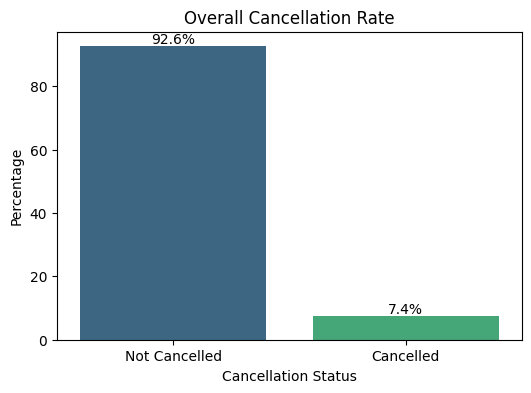

In [ ]:
# Visualize the cancellation rate
cancellation_column = [col for col in df.columns if "cancel" in col.lower()]

if cancellation_column:
    cancel_col = cancellation_column[0]
    cancellation_rate = df[cancel_col].value_counts(normalize=True) * 100

    # Plot the cancellation rate
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, palette="viridis")
    for p in ax.patches:
      ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')

    plt.xlabel("Cancellation Status")
    plt.ylabel("Percentage")
    plt.title("Overall Cancellation Rate")
    plt.xticks(ticks=[0, 1], labels=['Not Cancelled', 'Cancelled'])
    plt.show()
else:
    print("Cancellation column not found in dataset")


### 2. Examine distributions and relationships between key predictors and cancellations.

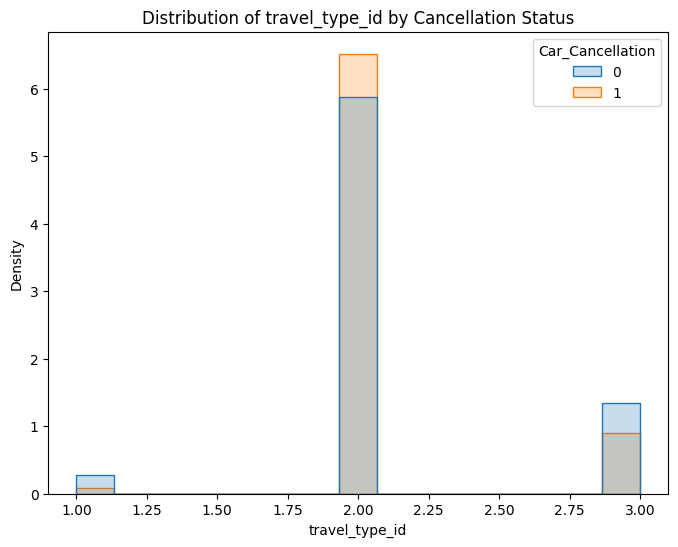

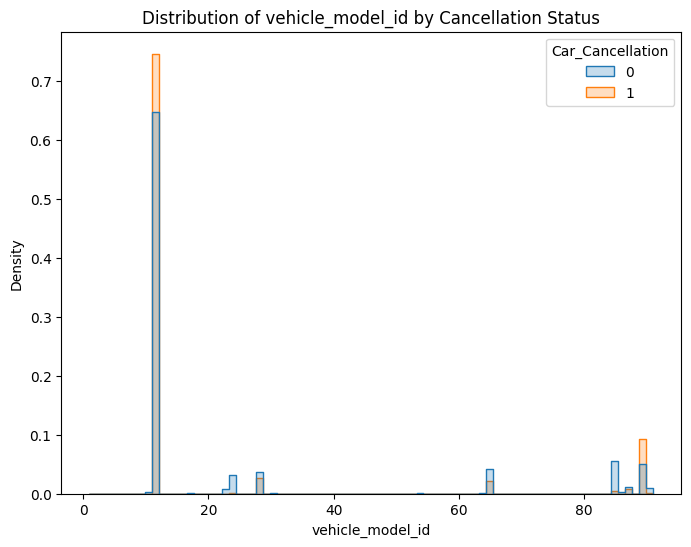

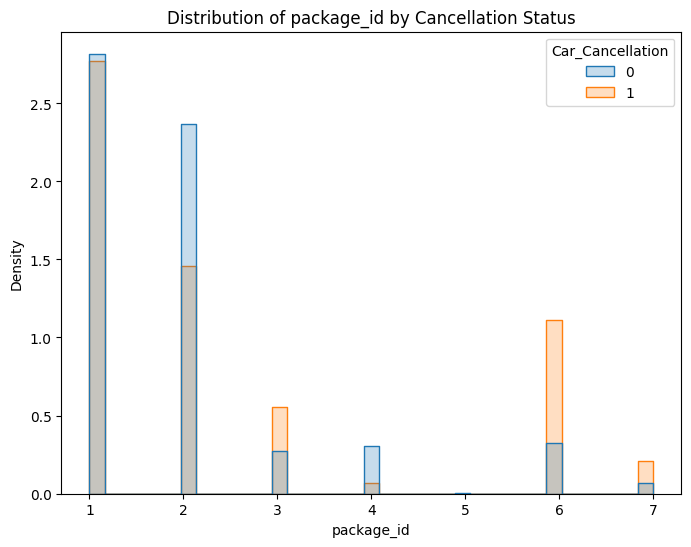

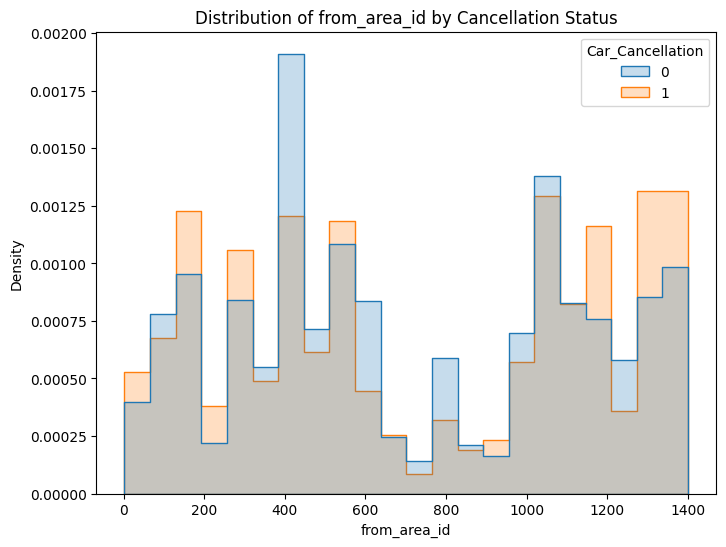

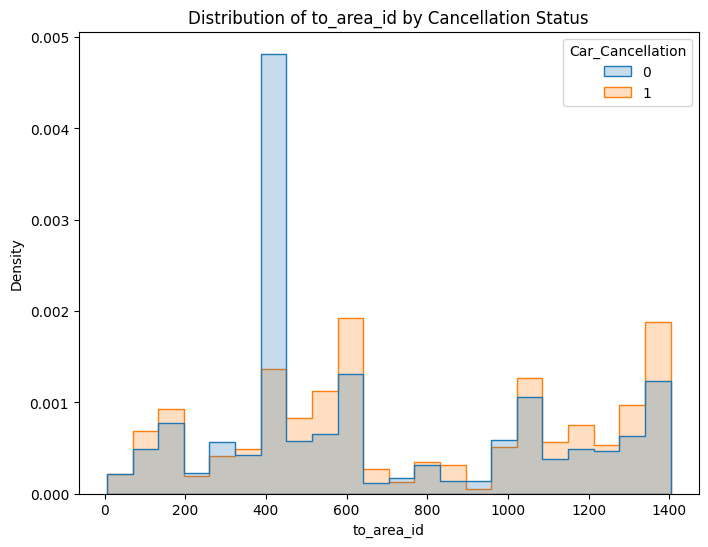

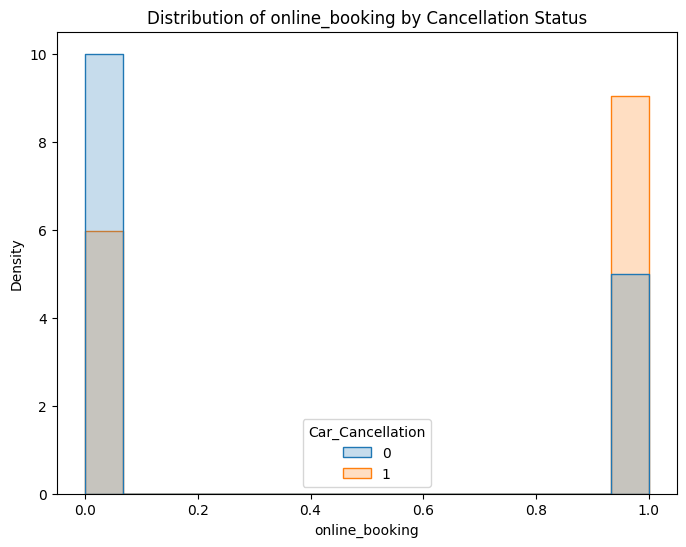

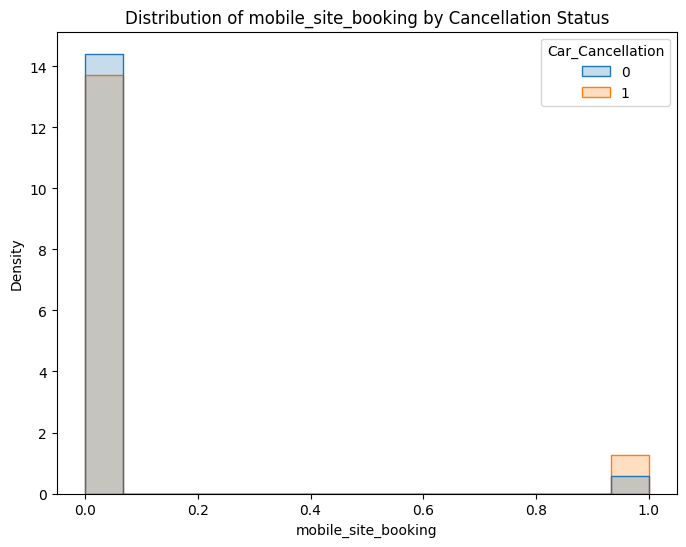

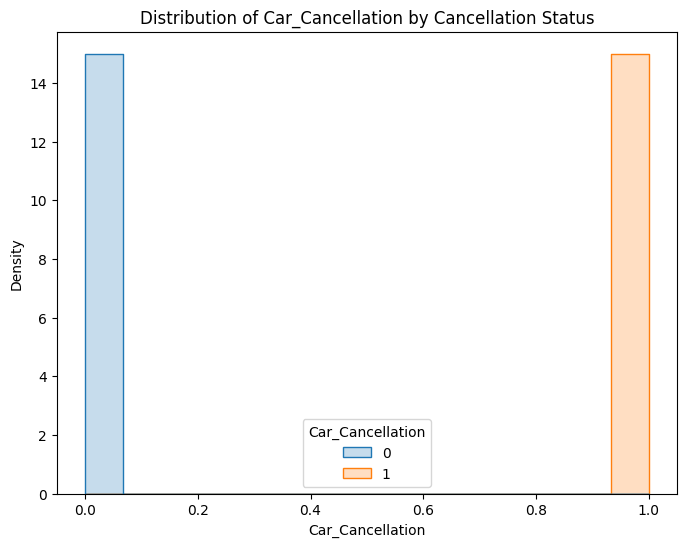

In [ ]:
# Select numerical features relevant to cancellations
numerical_features = ['travel_type_id', 'vehicle_model_id', 'package_id', 'from_area_id', 'to_area_id',
                      'online_booking', 'mobile_site_booking', 'Car_Cancellation']

# Create histograms for each feature, separated by cancellation status
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Car_Cancellation', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by Cancellation Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

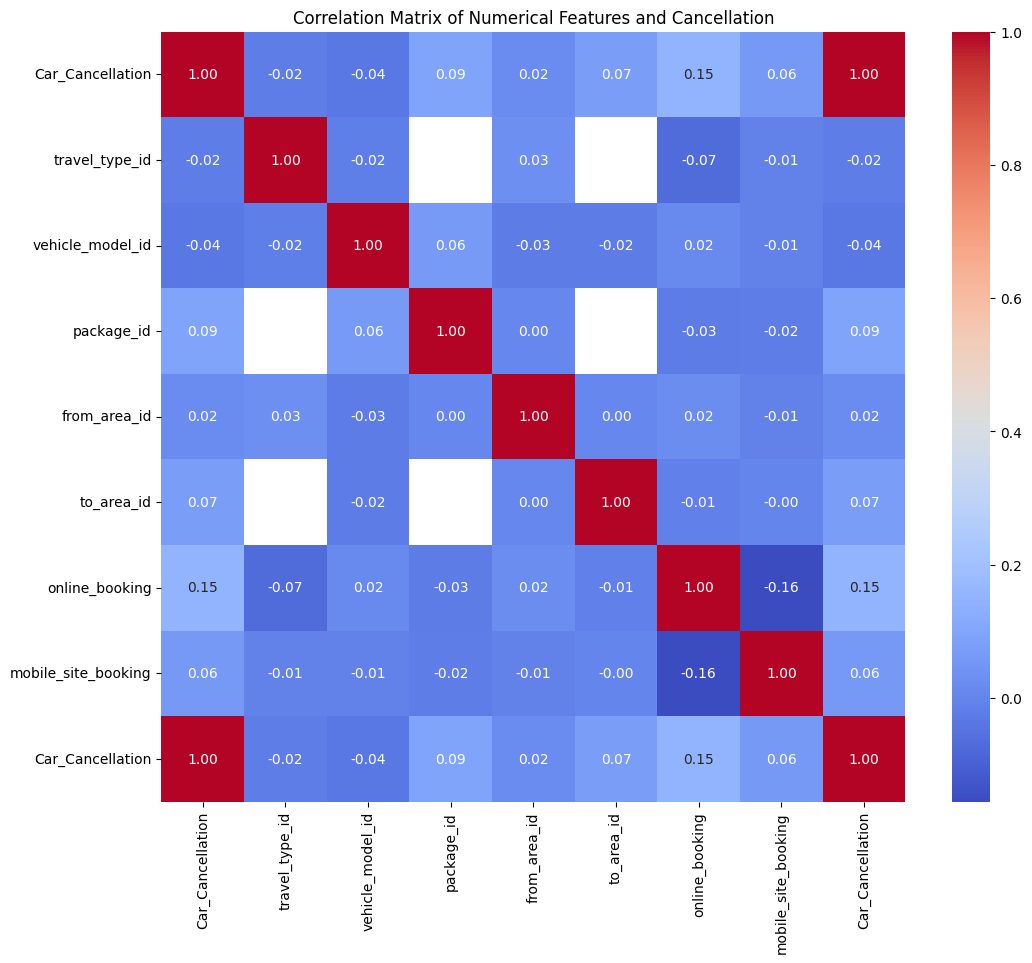

In [ ]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df[['Car_Cancellation'] + numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Cancellation')
plt.show()

## Data Cleaning

In [ ]:
# Check for missing values
df.isnull().sum()

,0
row#,0
user_id,0
vehicle_model_id,0
package_id,8248
travel_type_id,0
from_area_id,15
to_area_id,2091
from_city_id,6294
to_city_id,9661
from_date,0


In [ ]:
# Drop columns that are not useful or have excessive missing values
df_cleaned = df.drop(columns=['row#', 'user_id', 'from_city_id', 'to_city_id'])

In [ ]:
# Fill missing values for 'package_id' and GPS data with median
df_cleaned['package_id'].fillna(df_cleaned['package_id'].median(), inplace=True)
df_cleaned['from_area_id'].fillna(df_cleaned['from_area_id'].median(), inplace=True)
df_cleaned['to_area_id'].fillna(df_cleaned['to_area_id'].median(), inplace=True)
df_cleaned['from_lat'].fillna(df_cleaned['from_lat'].median(), inplace=True)
df_cleaned['from_long'].fillna(df_cleaned['from_long'].median(), inplace=True)
df_cleaned['to_lat'].fillna(df_cleaned['to_lat'].median(), inplace=True)
df_cleaned['to_long'].fillna(df_cleaned['to_long'].median(), inplace=True)


## Feature Engineering

In [ ]:
# # Convert date columns to datetime format
# df_cleaned['from_date'] = pd.to_datetime(df_cleaned['from_date'], unit='D', origin='1899-12-30')
# df_cleaned['booking_created'] = pd.to_datetime(df_cleaned['booking_created'], unit='D', origin='1899-12-30')

# # Extract features: 'day of the week' and 'hour of booking'
# df_cleaned['day_of_week'] = df_cleaned['booking_created'].dt.dayofweek
# df_cleaned['hour_of_booking'] = df_cleaned['booking_created'].dt.hour

In [ ]:
# Add holiday flag feature
import holidays

# Assuming 'from_date' column contains the date of the trip
def is_holiday(date, country='CA'):
    ca_holidays = holidays.country_holidays(country)
    return 1 if date in ca_holidays else 0

df_cleaned['holiday_flag'] = df_cleaned['from_date'].apply(is_holiday)
df_cleaned.head()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,holiday_flag
0,12,2.0,2,1021.0,1323.0,41275.94,NaN,0,0,41275.33403,13.028530,77.54625,12.869805,77.653211,0,1
1,12,2.0,2,455.0,1330.0,41275.53,NaN,0,0,41275.41597,12.999874,77.67812,12.953434,77.706510,0,1
2,12,2.0,2,814.0,393.0,41276.02,41277.0,1,0,41275.50972,12.908993,77.68890,13.199560,77.706880,0,1
3,12,2.0,2,297.0,212.0,41275.55,NaN,0,0,41275.52917,12.997890,77.61488,12.994740,77.607970,0,1
4,28,2.0,2,1237.0,330.0,41275.69,NaN,0,0,41275.62986,12.926450,77.61206,12.858833,77.589127,0,1


In [ ]:
# Convert date columns to datetime format
df_cleaned['from_date'] = pd.to_datetime(df_cleaned['from_date'], unit='D', origin='1899-12-30')
df_cleaned['to_date'] = pd.to_datetime(df_cleaned['to_date'], unit='D', origin='1899-12-30')
df_cleaned['booking_created'] = pd.to_datetime(df_cleaned['booking_created'], unit='D', origin='1899-12-30')

# Extract features: 'day of the week', 'hour of booking', and 'day of month'
df_cleaned['day_of_week'] = df_cleaned['booking_created'].dt.dayofweek
df_cleaned['hour_of_booking'] = df_cleaned['booking_created'].dt.hour
#df_cleaned['day_of_month'] = df_cleaned['booking_created'].dt.day # Add day of month

# Drop original date columns after feature extraction
df_cleaned = df_cleaned.drop(columns=['from_date', 'to_date', 'booking_created']) # Drop the datetime columns
df_cleaned.head()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,holiday_flag,day_of_week,hour_of_booking
0,12,2.0,2,1021.0,1323.0,0,0,13.028530,77.54625,12.869805,77.653211,0,1,1,8
1,12,2.0,2,455.0,1330.0,0,0,12.999874,77.67812,12.953434,77.706510,0,1,1,9
2,12,2.0,2,814.0,393.0,1,0,12.908993,77.68890,13.199560,77.706880,0,1,1,12
3,12,2.0,2,297.0,212.0,0,0,12.997890,77.61488,12.994740,77.607970,0,1,1,12
4,28,2.0,2,1237.0,330.0,0,0,12.926450,77.61206,12.858833,77.589127,0,1,1,15


In [ ]:
# One-Hot Encoding for categorical variables
categorical_cols = ['travel_type_id', 'vehicle_model_id', 'online_booking', 'mobile_site_booking']
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=False)

In [ ]:
import geopy.distance

def calculate_distance(row):
    coords_1 = (row['from_lat'], row['from_long'])
    coords_2 = (row['to_lat'], row['to_long'])
    return geopy.distance.geodesic(coords_1, coords_2).km

df_cleaned['trip_distance_km'] = df_cleaned.apply(calculate_distance, axis=1)

In [ ]:
# Normalize numerical features - Excluding 'day_of_week', 'hour_of_booking', and 'day_of_month'
numeric_cols = ['from_area_id', 'to_area_id', 'from_lat', 'from_long',
               'to_lat', 'to_long']  # Excluding datetime-based features
scaler = StandardScaler()
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Display cleaned dataset info
df_cleaned.head()


,package_id,from_area_id,to_area_id,from_lat,from_long,to_lat,to_long,Car_Cancellation,holiday_flag,day_of_week,...,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91,online_booking_0,online_booking_1,mobile_site_booking_0,mobile_site_booking_1,trip_distance_km
0,2.0,0.743831,1.905830,0.528672,-1.538256,-1.436116,0.204622,0,1,1,...,False,False,False,False,False,True,False,True,False,21.048611
1,2.0,-0.608103,1.925199,0.193876,0.711321,-0.620895,1.147724,0,1,1,...,False,False,False,False,False,True,False,True,False,5.990251
2,2.0,0.249396,-0.667396,-0.867911,0.895218,1.778359,1.154271,0,1,1,...,False,False,False,False,False,False,True,True,False,32.204802
3,2.0,-0.985499,-1.168206,0.170697,-0.367493,-0.218241,-0.595897,0,1,1,...,False,False,False,False,False,True,False,True,False,0.826682
4,2.0,1.259764,-0.841711,-0.663956,-0.415600,-1.543072,-0.929315,0,1,1,...,False,False,False,False,False,True,False,True,False,7.883644


# Neural Network Implementation

## T2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
X = df_cleaned.drop('Car_Cancellation', axis=1)
y = df_cleaned['Car_Cancellation']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.1)

Epoch 1/40
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6648 - loss: 1.3449 - val_accuracy: 0.9271 - val_loss: 0.2654
Epoch 2/40
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9279 - loss: 0.2558 - val_accuracy: 0.9271 - val_loss: 0.2473
Epoch 3/40
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9227 - loss: 0.2488 - val_accuracy: 0.9257 - val_loss: 0.2344
Epoch 4/40
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9256 - loss: 0.2298 - val_accuracy: 0.9257 - val_loss: 0.2281
Epoch 5/40
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9221 - loss: 0.2369 - val_accuracy: 0.9257 - val_loss: 0.2258
Epoch 6/40
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9180 - loss: 0.2304 - val_accuracy: 0.9257 - val_loss: 0.2248
Epoch 7/40
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.2267 - val_accuracy: 0.9271 - val_loss: 0.2292
Epoch 8/40
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.2238 - val_accuracy: 0.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9290 - loss: 0.2401
Test Loss: 0.22726619243621826
Test Accuracy: 0.9259999990463257


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.3).astype(int)  # Convert probabilities to class labels (0 or 1)
cm = confusion_matrix(y_test, y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[2704   95]
 [ 163   38]]
Accuracy: 0.914
Precision: 0.2857142857142857
Recall: 0.1890547263681592
F1 Score: 0.2275449101796407


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test) > 0.3).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[2704   95]
 [ 163   38]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2799
           1       0.29      0.19      0.23       201

    accuracy                           0.91      3000
   macro avg       0.61      0.58      0.59      3000
weighted avg       0.90      0.91      0.91      3000



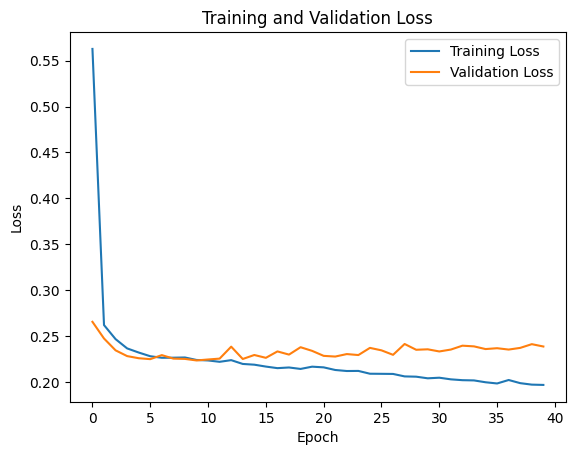

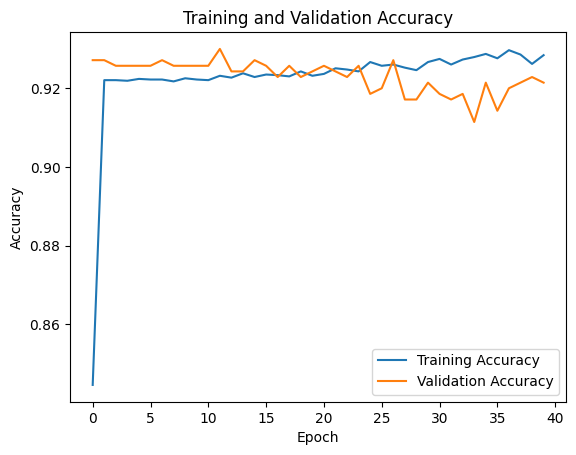

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

PermutationExplainer explainer: 3001it [03:54, 12.19it/s]                          


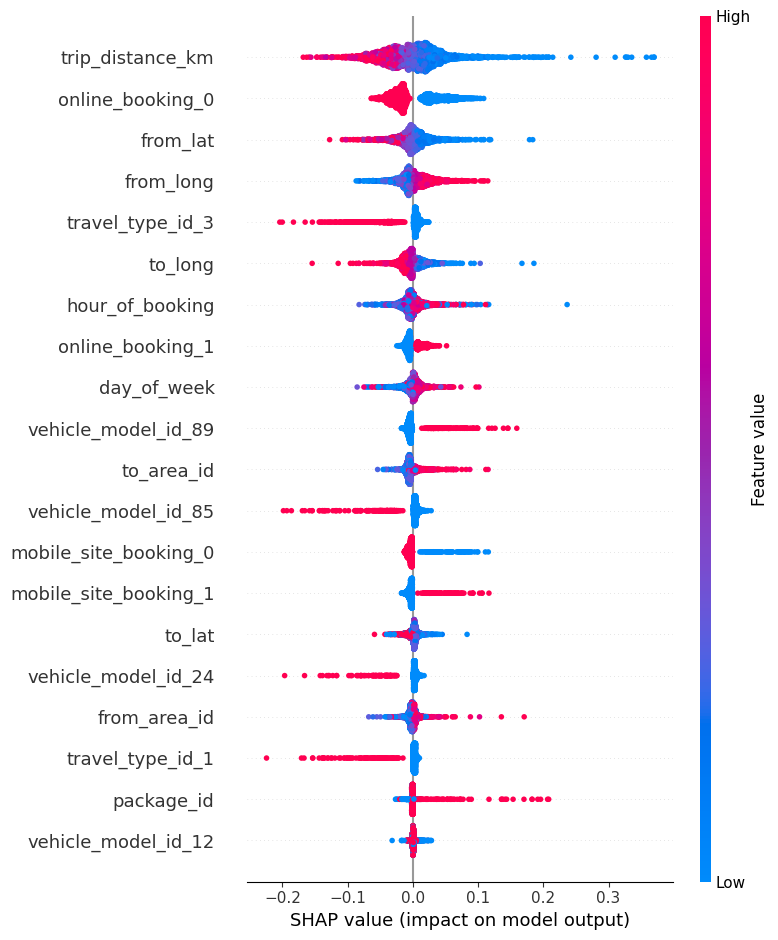

In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP values to see important features
shap.summary_plot(shap_values, X_test)

# Drop least important features and retrain the model


# Task
develop a machine learning model using Exploratory Data Analysis (EDA) and machine learning techniques, providing actionable insights for revenue optimization.

Here is all the data you need:
"hotel_bookings.csv"

## Data loading

### Subtask:
Load the hotel booking dataset into a Pandas DataFrame.


**Reasoning**:
Import pandas and load the hotel booking dataset into a DataFrame, then display the first 5 rows to verify the data loading.



In [ ]:
import pandas as pd

df_hotel_bookings = pd.read_csv('hotel_bookings.csv')
display(df_hotel_bookings.head())